<a href="https://colab.research.google.com/github/LashawnFofung/Python-Document-Preparation-and-Extraction/blob/main/Task_Compare_3_OCR_Engines_on_a_Mortgage_PDF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Compare 3 OCR Engines on a Mortgage PDF**

**Comparing:**
* [Tesseract ](#scrollTo=Bcdtot5v9KA0&line=1&uniqifier=1)
  * Classic option
  * Quick and lightweight
* [PaddleOCR](#scrollTo=XPTZcPRU9Rqq&line=1&uniqifier=1)
  * Powerful
  * Layout-aware
  * Great for structured docs
* [EasyOCR](#scrollTo=5s528lJQ9ZMS&line=1&uniqifier=1)
  * Super easy to install
  * Works well on scanned forms




---



**Data:** LenderFeesWorksheetNew.pdf



# **Tesseract**

In [40]:
# =================================================
# Step 1: Install Dependencies
# ==================================================

!apt install tesseract-ocr
!pip install pymupdf pytesseract opencv-python pillow

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 41 not upgraded.


In [41]:
# =================================================
# Step 2: Import Libraries
# ==================================================

import fitz # PyMuPDF - to read and convert PDF pages into images
import cv2 # OpenCV - helps clean up images and draw boxes around detected text
import pytesseract # Tesseract OCR - to extract text from scanned images
import numpy as np # NumPy - handles numbers and makes working with images easier
from PIL import Image # Pillow (PIL) - lets us display and work with images in Colab

In [42]:
# =========================================
# Step 3: Load Scanned PDF
# =========================================

#Upload "LenderFeesWorksheetNew.pdf" manually in Colab
from google.colab import files

uploaded = files.upload()
pdf_path = list(uploaded.keys())[0] # Get uploaded file name

#Open the Mortgage Document "LenderFeesWorksheetNew.pdf"
doc = fitz.open(pdf_path)

Saving LenderFeesWorksheetNew.pdf to LenderFeesWorksheetNew (3).pdf


In [43]:
# =========================================
# Step 4: Try Extracting text Without OCR
# Will Fail
# Document does no contain actual text
# Document is an image (Scanned PDF)
# =========================================

page = doc[0]
text = page.get_text("text") # Normal text extraction
print("Extracted Text:", text) # Expecting empty or incorrect output

Extracted Text: Your actual rate, payment, and cost could be higher. Get an official Loan Estimate before choosing a loan.
Fee Details and Summary
Applicants:
Application No:
Date Prepared:
Loan Program:
Prepared By:
THIS IS NOT A GOOD FAITH ESTIMATE (GFE). This "Fees Worksheet" is provided for informational purposes ONLY, to assist
you in determining an estimate of cash that may be required to close and an estimate of your proposed monthly mortgage 
payment. Actual charges may be more or less, and your transaction may not involve a fee for every item listed.
Total Loan Amount:  
Interest Rate:
Term/Due In:
Fee
Paid To
Paid By (Fee Split**)
Amount
PFC / F / POC
TOTAL ESTIMATED FUNDS NEEDED TO CLOSE:
TOTAL ESTIMATED MONTHLY PAYMENT:
Total Estimated Funds
Total Monthly Payment
Purchase Price (+)
Alterations (+)
Land (+)
Refi (incl. debts to be paid off) (+)
Est. Prepaid Items/Reserves (+)
Est. Closing Costs (+)
Loan Amount (-)
Principal & Interest
Other Financing (P & I)
Hazard Insurance

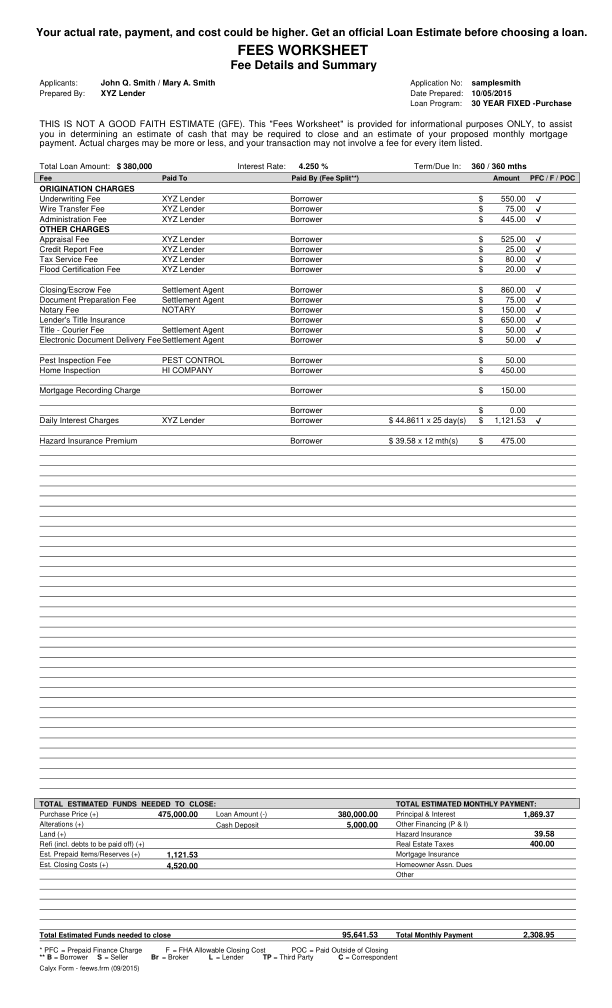

In [44]:
# =============================================================================
# Step 5: Convert PDF to Image for OCR
# Takes a single page extracted from a PDF document using PyMuPDF (fitz),
# & converts into a format that can be processed by tools like OpenCV
# or Tesseract OCR, which typically require the data to be in an image format,
# usually NumPy array.
# =============================================================================

pix = page.get_pixmap() #Generate raterized image (pixel map)

#Convert the raw pixmap data into a PIL (Pillow) Image object
img = np.array(Image.frombytes("RGB", [pix.width, pix.height], pix.samples))

# Display the converted image using Pillow's display function
display(Image.fromarray(img)) # Display image

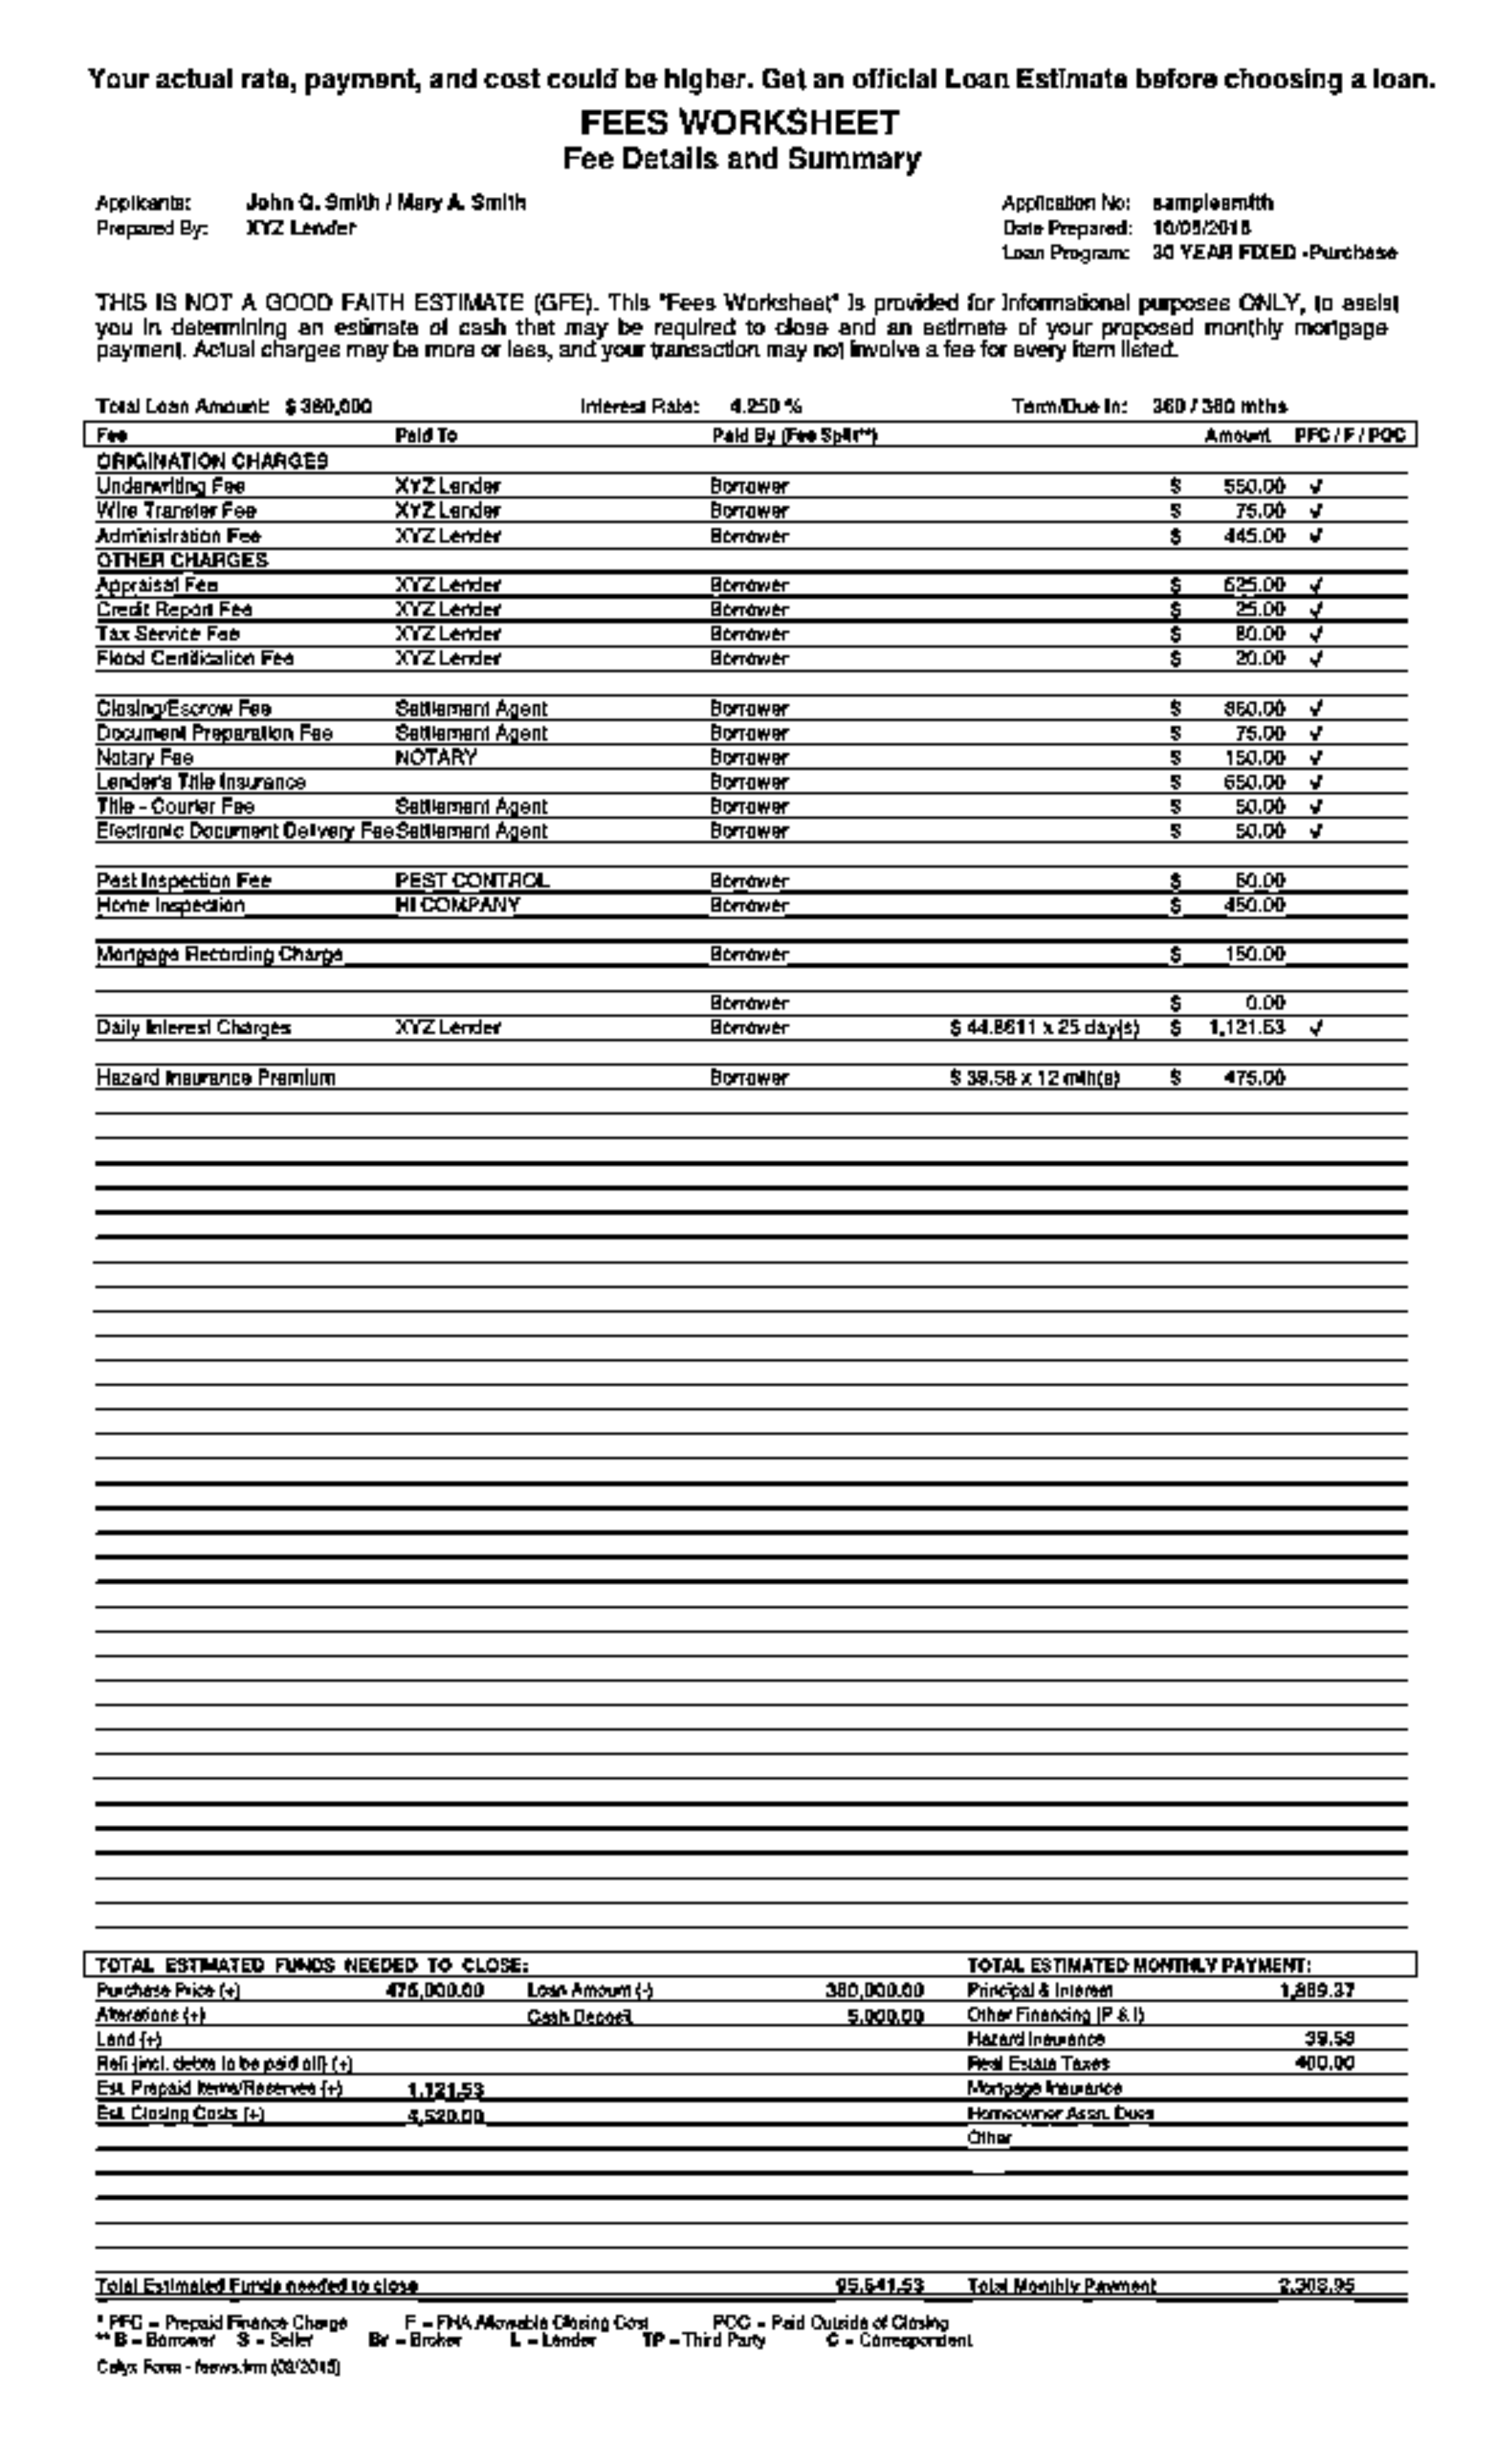

In [45]:
# ==========================================================================
# Step 6: Preprocess Image for Better OCR Accuracy
# Use the OpenCV (cv2) library to manipulate the image.
# To clean up the image and enhance the text quality,
# Which significantly improves the accuracy of the OCR engine (Tesseract).
# ==========================================================================


#Convert image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)


# *****************2nd Method (Improved scanned image)*************************
# --- Improvement 1: Aggressive Denoising ---
# Use Fast NLM Denoising to clear up noise while preserving edges better than simple blurring.
gray = cv2.fastNlMeansDenoising(gray, None, 10, 7, 21)

# --- Improvement 2: Adaptive Gaussian Thresholding ---
# This applies a local, non-uniform threshold. It retains high contrast for OCR
# but is often better for uneven lighting and looks visually smoother/lighter
# than a global threshold like Otsu's.
gray = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)


#Apply Bilateral Filtering to reduce noise while preserving edges
gray = cv2.bilateralFilter(gray, 25, 35, 35)

# --- Improvement 3: Higher Resizing Factor for Scanned Text ---
scale_percent = 400 # Increased from 200% to 400% for better OCR
width = int(gray.shape[1] * scale_percent / 100)
height = int(gray.shape[0] * scale_percent / 100)

# Use INTER_LINEAR for resizing to maintain crisp lines on the binary image
gray = cv2.resize(gray, (width, height), interpolation=cv2.INTER_LINEAR)

#Show the preprocessed image
display(Image.fromarray(gray))


In [46]:
# ==================================================
# Step 7.1: Perform OCR on the Image
# ==================================================

#Use optimized Tesseract OCR configurations
custom_config = r'--oem 3 -l eng'
ocr_text = pytesseract.image_to_string(gray, config=custom_config)

print("OCR Extracted text:\n", ocr_text)


# ===================================================
# Step 7.2: Extract bounding Boxes from OCR Output
# ===================================================

ocr_data = pytesseract.image_to_data(gray, output_type=pytesseract.Output.DICT)


#Print first 5 extracted words with bounding boxes
for i in range (5):
  print(f"Word: {ocr_data['text'][i]}, BBox: ({ocr_data['left'][i]}, {ocr_data['top'][i]}, {ocr_data['width'][i]}, {ocr_data['height'][i]})")

OCR Extracted text:
 Your actual rata, payment, and cost could be higher. Get an official Loan Estimate before choosing a loan.

FEES WORKSHEET
Fee Details and Summary

Applkantar John &. Smith / Mary A Smith Artication ie: samplesmith
Prepared By: 9 YZ Lander Dste Prepared: 1005/MHB
Loan Programe 90 YEAR FOCED -Purtchase

THIS IS NOT A GOOD FAITH ESTIMATE (GFE). This "Fees Worksheat* 1s provided jor Infonmstional purposes GNLY, to aselst
you In determining an estimate af cash that may be required to close and an setimete of your proposed month moripspe
paymenl. Aciusl charges may ba more of lacs, and your transaction may no} involve a fee for avery Iter lletect

Teaal Lash Amount $380,000 Indertaa Rabe: = 2504S TarnhDueln: 3607380 mths
Fee Pald To Pald By (Fre Sp Amo PFC} F/ POC
ORG INATION CHARGES
Undarariting Fre X¥Z Larder Borrower § 550.00 wv
Vélre Trareies Foe X¥2Z Larder Borrower 5 75.00 v
Adminisiration Fee XVZ Lerder Bterawer $ 44500 wv
OTHER CHARGES

aitsl Féeo XVZ Léerder Bt

In [178]:
# ==========================================================
# Step 8: Post-OCR Processing & Extracting Key Information
# ==========================================================

import re
import json

# Step 8.1: Preprocess OCR Text (Cleaning & Formatting)
ocr_text = " ".join(ocr_text.split())  # Remove extra spaces & newlines
ocr_text = re.sub(r'[^a-zA-Z0-9\s,.%-]', '', ocr_text)  # Remove special chars

# Step 8.2: Fix Common OCR Errors
ocr_text = re.sub(r'\bL0AN\b', 'LOAN', ocr_text, flags=re.IGNORECASE)
ocr_text = re.sub(r'\bM0RTGAGE\b', 'MORTGAGE', ocr_text, flags=re.IGNORECASE)
ocr_text = re.sub(r'\b1NTEREST\b', 'INTEREST', ocr_text, flags=re.IGNORECASE)
ocr_text = re.sub(r'\bUNDERWRITING\b', 'UNDERWRITING', ocr_text, flags=re.IGNORECASE)
ocr_text = re.sub(r'\bPR1CE\b', 'PRICE', ocr_text, flags=re.IGNORECASE)
ocr_text = re.sub(r'\bLOAN\b', 'LOAN', ocr_text, flags=re.IGNORECASE)
ocr_text = re.sub(r'\bPROGRAM\b', 'PROGRAM', ocr_text, flags=re.IGNORECASE)
ocr_text = re.sub(r'\bAPP1KANTS\b', 'APPLICANTS', ocr_text, flags=re.IGNORECASE)


print("Final Cleaned OCR Text:\n", ocr_text)

Final Cleaned OCR Text:
 Your actual rata, payment, and cost could be higher. Get an official LOAN Estimate before choosing a LOAN. FEES WORKSHEET Fee Details and Summary Applkantar John . Smith Mary A Smith Artication ie samplesmith Prepared By 9 YZ Lander Dste Prepared 1005MHB LOAN Programe 90 YEAR FOCED -Purtchase THIS IS NOT A GOOD FAITH ESTIMATE GFE. This Fees Worksheat 1s provided jor Infonmstional purposes GNLY, to aselst you In determining an estimate af cash that may be required to close and an setimete of your proposed month moripspe paymenl. Aciusl charges may ba more of lacs, and your transaction may no involve a fee for avery Iter lletect Teaal Lash Amount 380,000 Indertaa Rabe 2504S TarnhDueln 3607380 mths Fee Pald To Pald By Fre Sp Amo PFC F POC ORG INATION CHARGES Undarariting Fre XZ Larder Borrower 550.00 wv Vlre Trareies Foe X2Z Larder Borrower 5 75.00 v Adminisiration Fee XVZ Lerder Bterawer 44500 wv OTHER CHARGES aitsl Feo XVZ Lerder Bterawer 625.00 Credit Repo Fea 

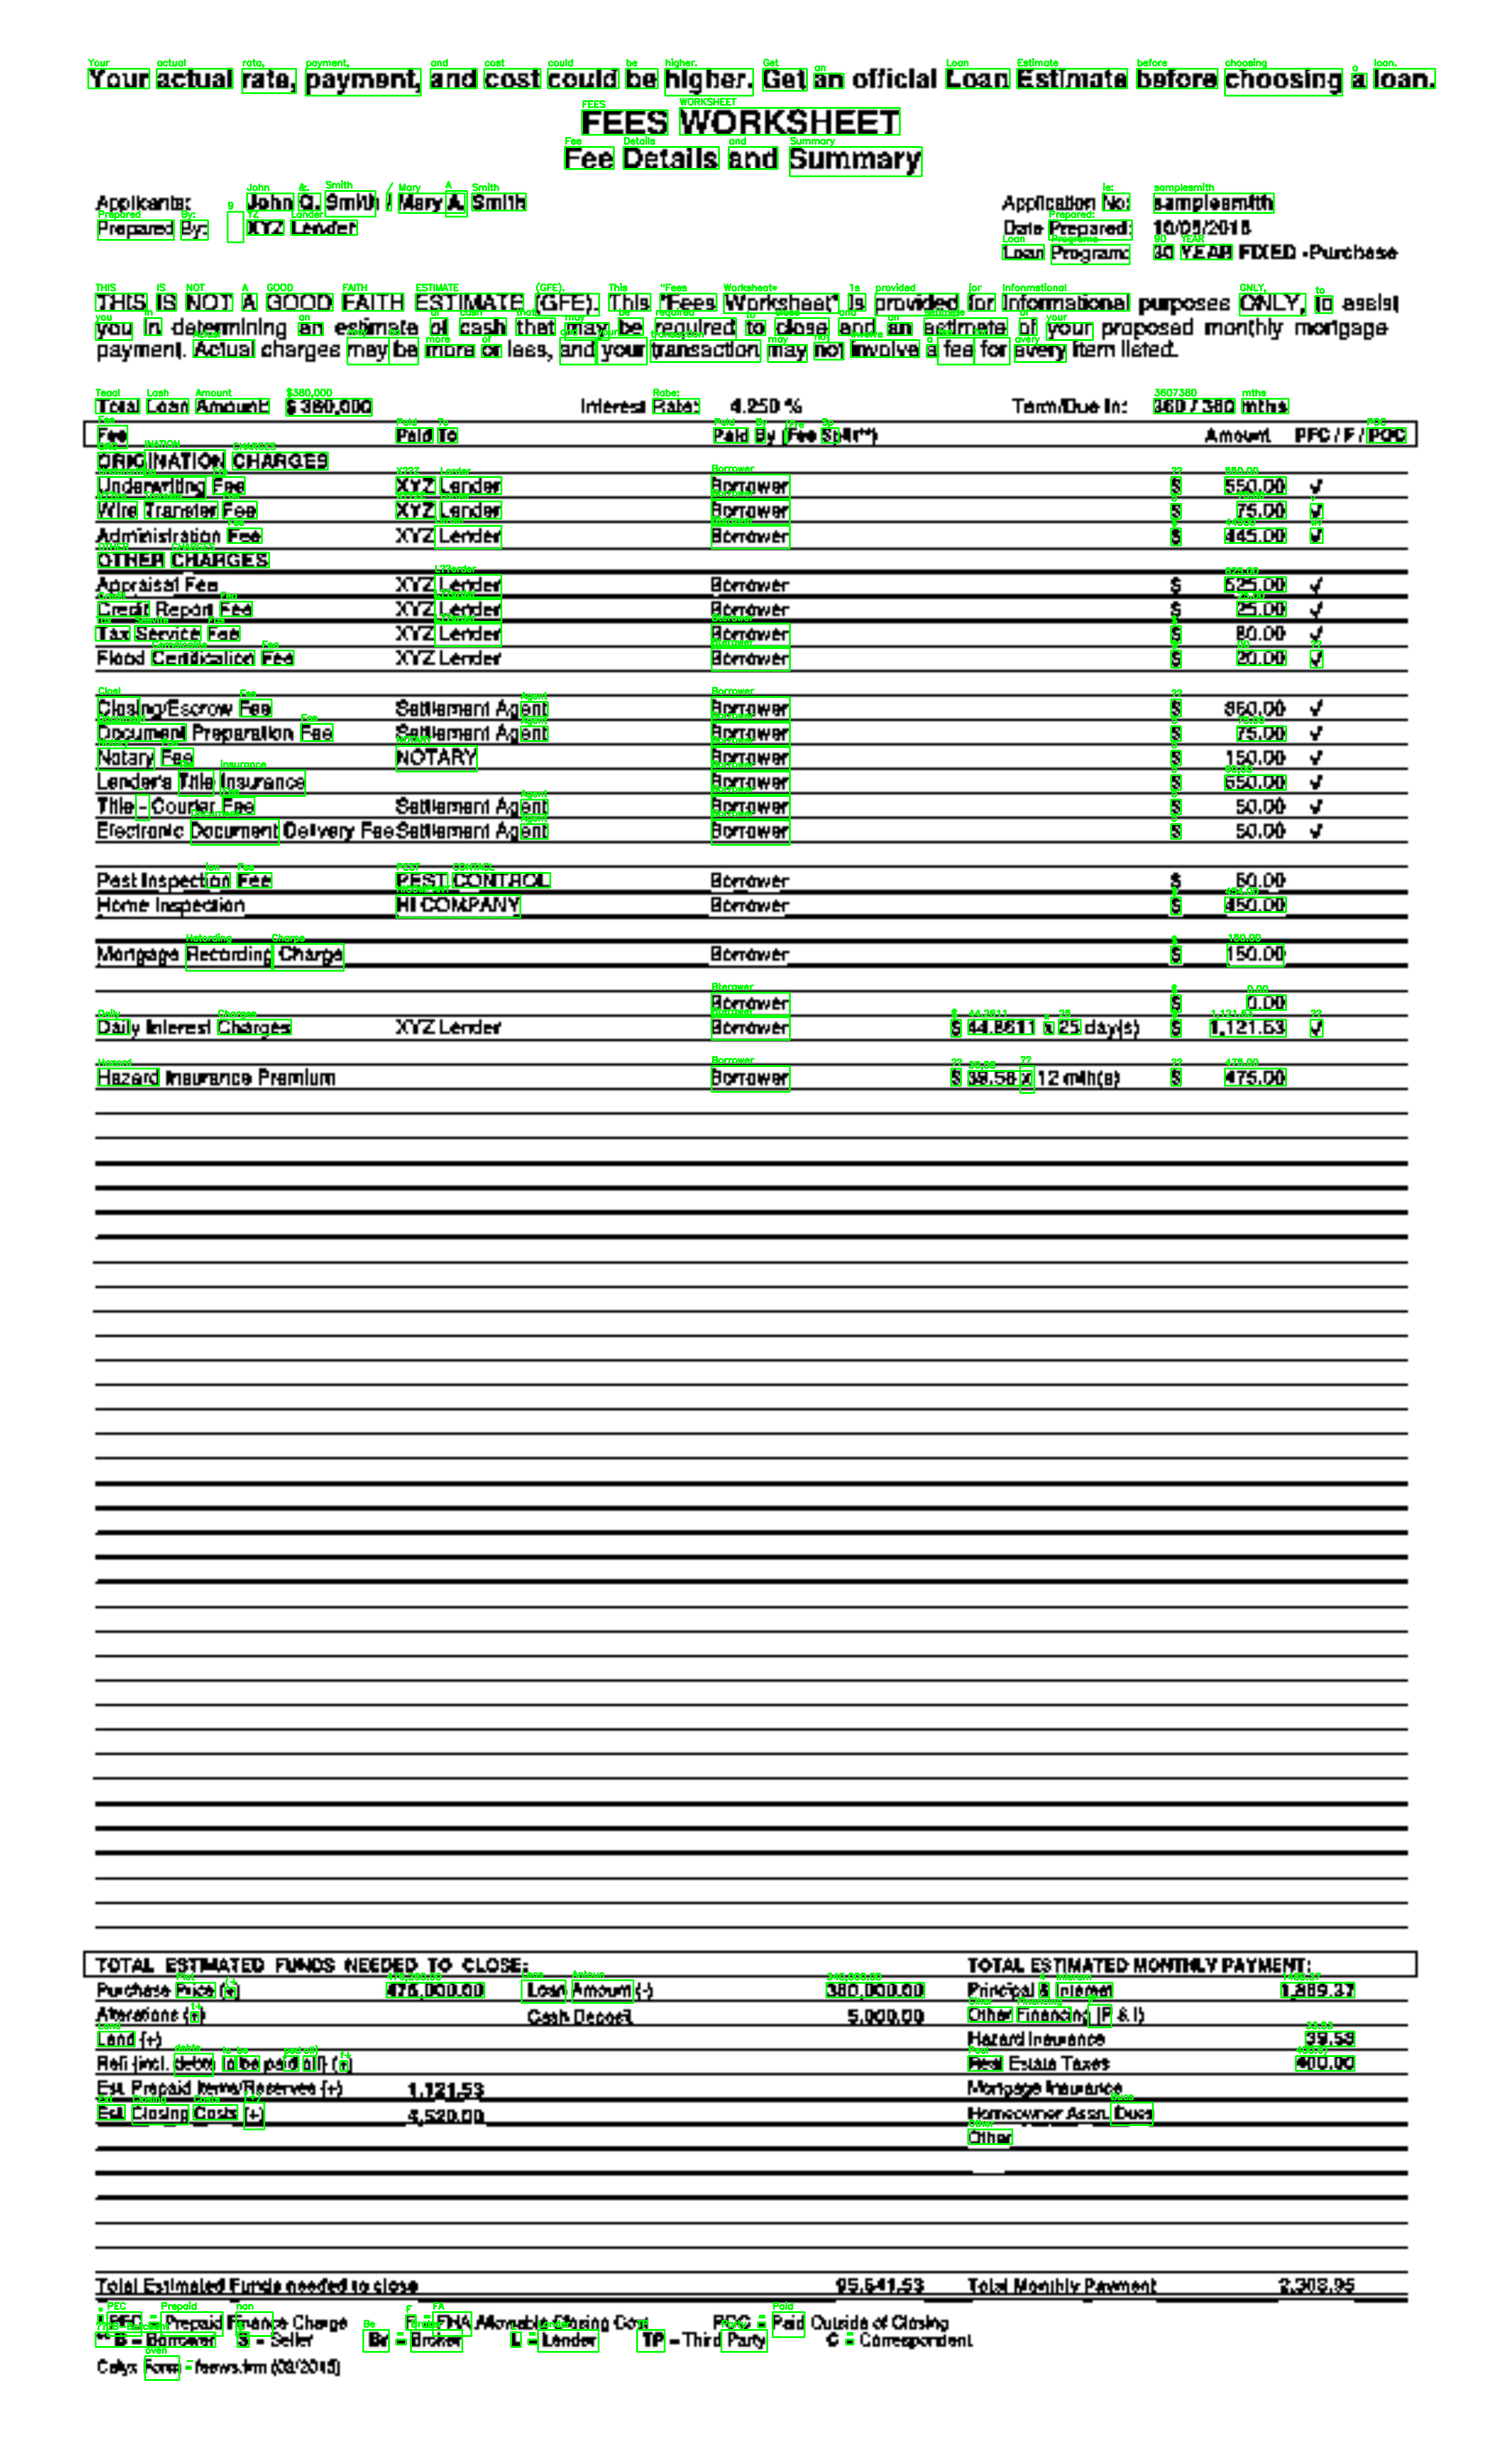

In [179]:
# ==================================================================
# Step 9: Highlighting OCR Results with Bounding Boxes
# Takes the text results from a Tesseract OCR run
# Uses the positional data provided, by Tesseract
# to draw bounding boxes around each recognized word,
# and displays the image with these overlays.
# ==================================================================

import cv2
from PIL import Image

# Convert image to OpenCV BGR format
img_bgr = cv2.cvtColor(gray, cv2.COLOR_RGB2BGR)

# Get OpenCV image height for correct y-coordinate transformation
page_height = gray.shape[0]

# Define confidence threshold (ignore low-confidence words)
confidence_threshold = 40


# ==================================================================
# Step 9.1: Loop through Extracted OCR Words & Draw Bounding Boxes
# ==================================================================

for i in range(len(ocr_data["text"])):
    word = ocr_data["text"][i].strip()
    x, y, w, h = ocr_data["left"][i], ocr_data["top"][i], ocr_data["width"][i], ocr_data["height"][i]
    conf = int(ocr_data["conf"][i])  # Convert confidence to int

    # Ignore empty words & low-confidence OCR text
    if not word or conf < confidence_threshold:
        continue

    # Fix y-coordinate to match OpenCV's top-left origin
    #y = page_height - y

    # Draw bounding box
    cv2.rectangle(img_bgr, (x, y), (x + w, y + h), (0, 255, 0), 2)
    cv2.putText(img_bgr, word, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)


# ==================================================================
# Step 9.2: Convert Back to RGB & Display the Image
# ==================================================================

img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
display(Image.fromarray(img_rgb))


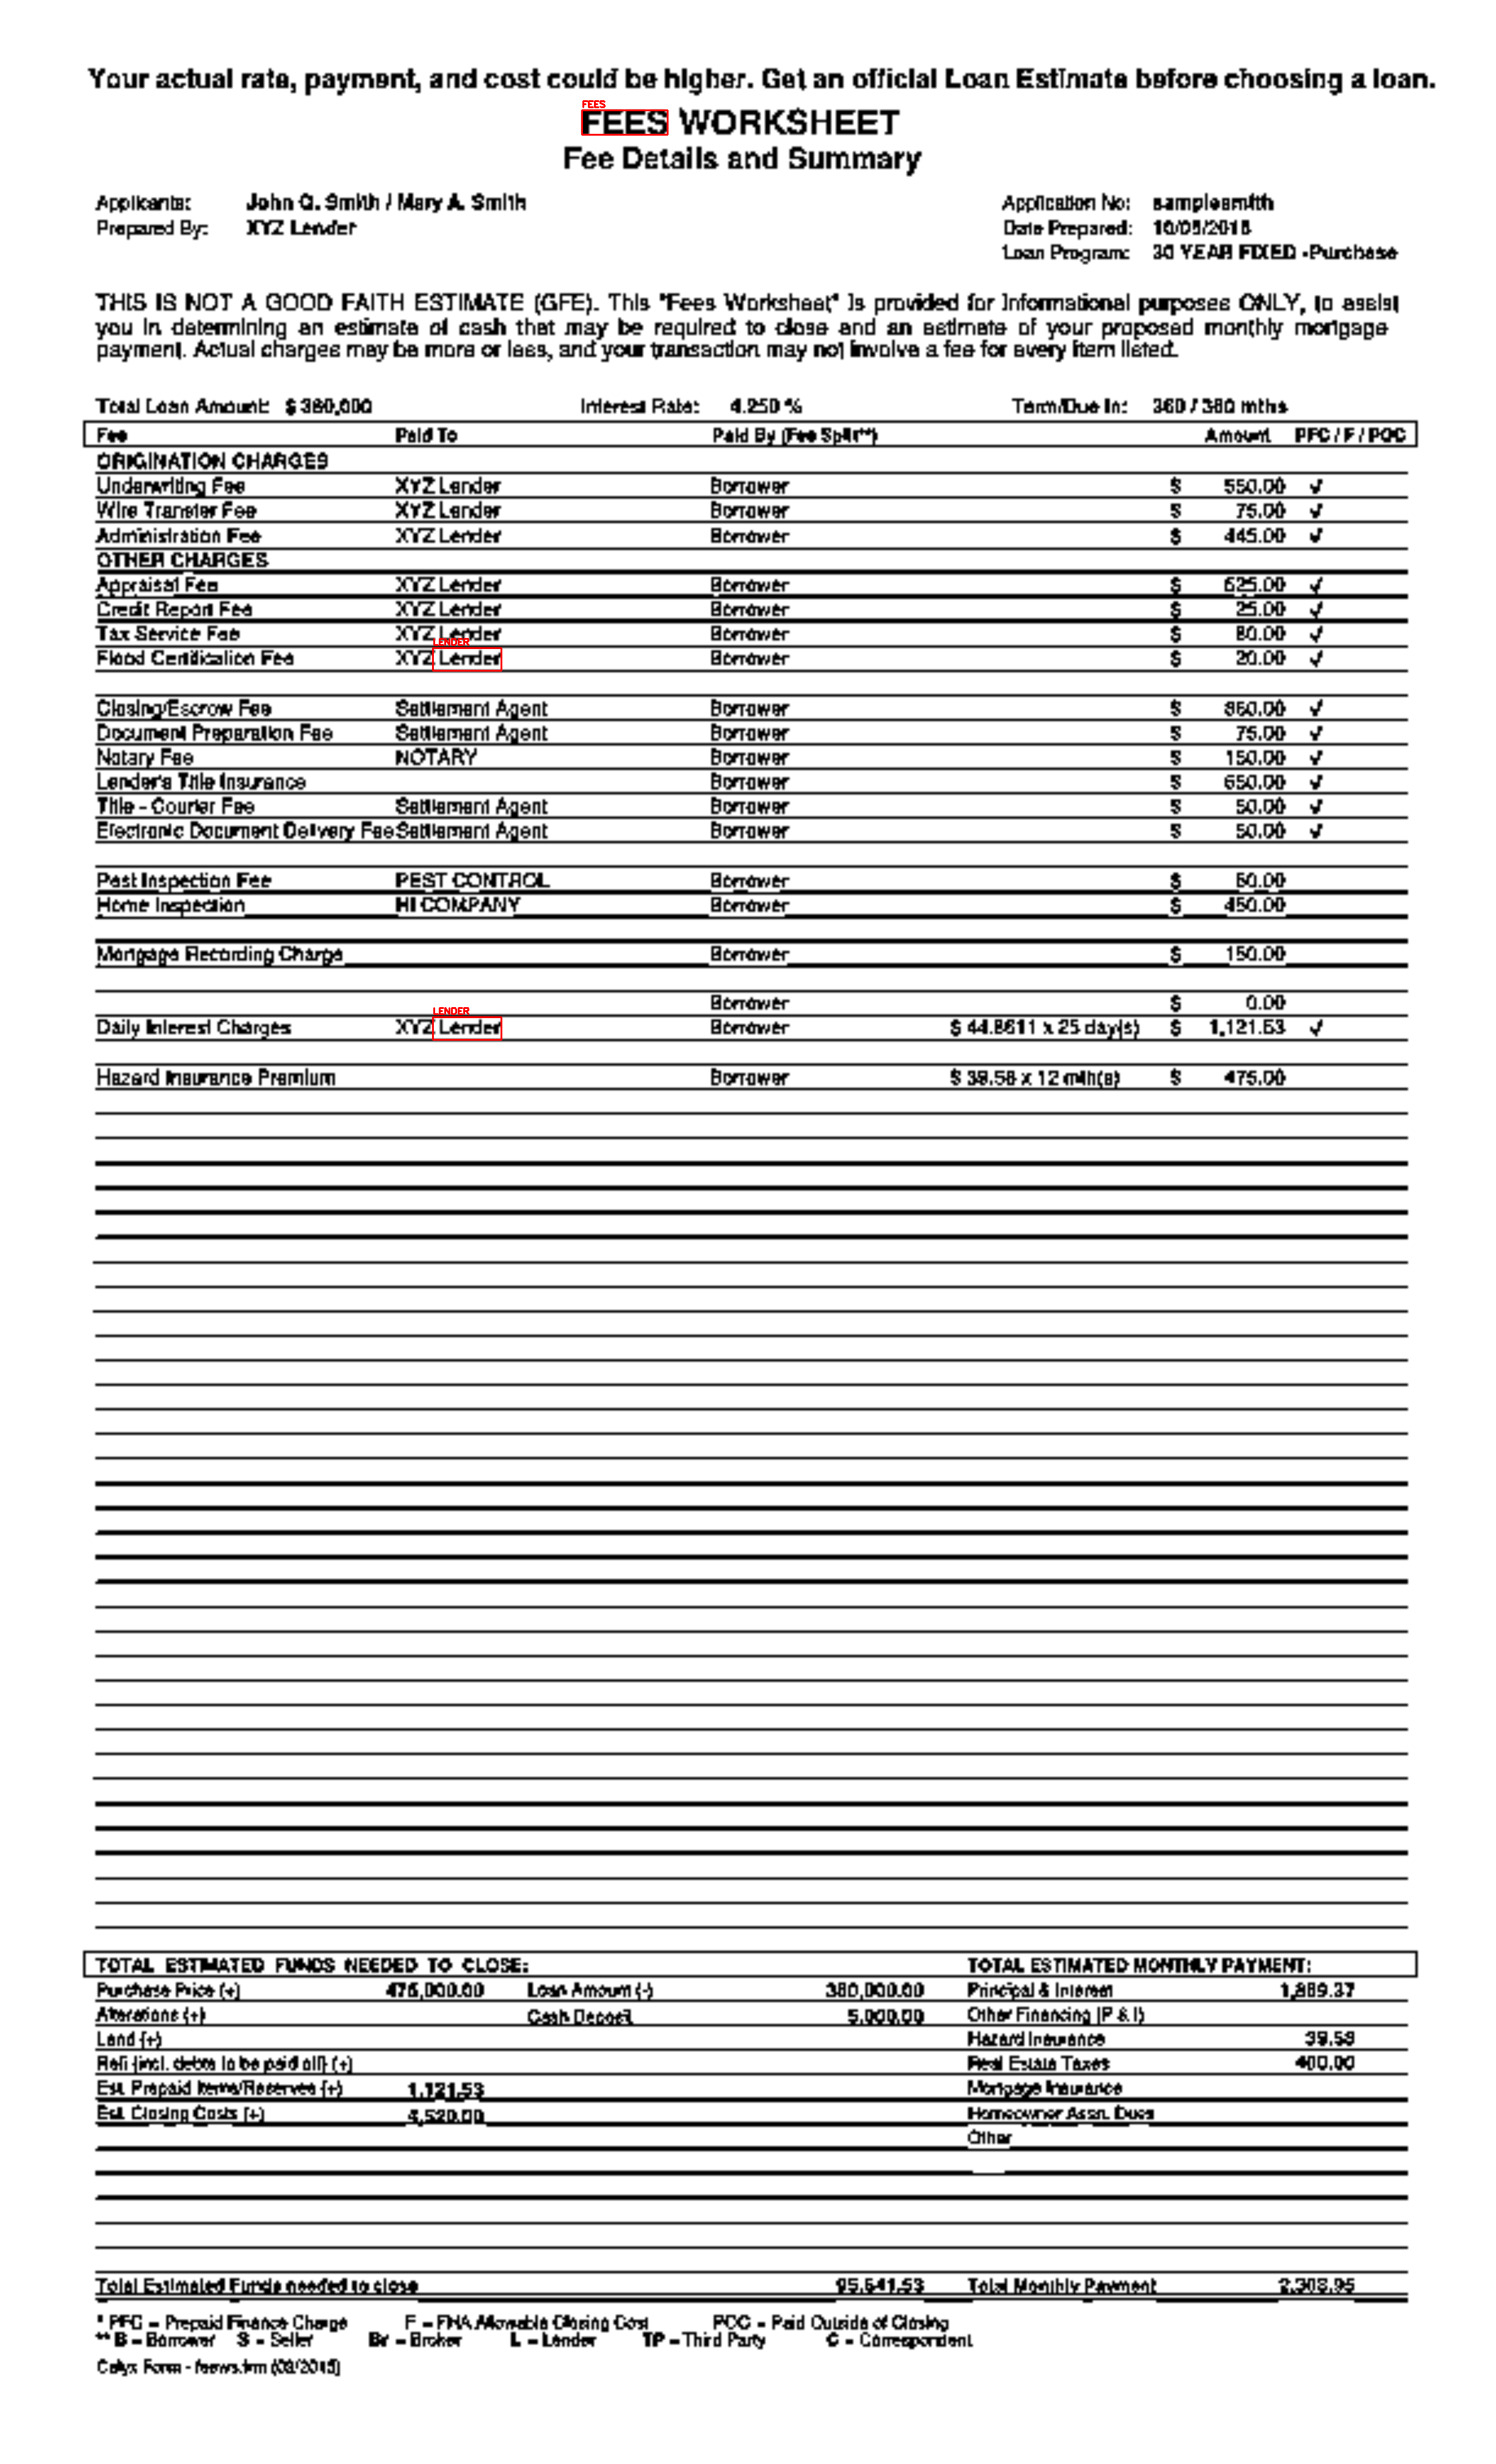

In [180]:
# ========================================================
# Step 10: Draw Bounding Boxes
# on Relevant Key Fields from Mortgage Document
# Visual Annotation of OCR results
# ========================================================

import cv2

# Convert image to OpenCV BGR format
img_bgr = cv2.cvtColor(gray, cv2.COLOR_RGB2BGR)

# Define key fields dynamically based on document content
key_fields = ["APPLICANTS", "FEES", "PRICE", "LOAN PROGRAM", "RATE", "TOTAL LOAN AMOUNT", "LENDER", "PROPERTY ADDRESS", "DATE", "SIGNATURE"]


# --- Improvement: Define an expansion margin for the bounding box ---
expansion_margin = 10


# Loop through extracted OCR words
for i in range(len(ocr_data["text"])):
    word = ocr_data["text"][i].strip().upper()  # Convert to uppercase for better matching
    x, y, w, h = ocr_data["left"][i], ocr_data["top"][i], ocr_data["width"][i], ocr_data["height"][i]

    if word in key_fields:  # Highlight only key fields found in the document
        cv2.rectangle(img_bgr, (x, y), (x + w, y + h), (0, 0, 255), 2)  # Red bounding box
        cv2.putText(img_bgr, word, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)

# Convert back to RGB for display
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
display(Image.fromarray(img_rgb))

In [181]:
# ==========================================================
# Step 11: Extract Key Fields into Structured JSON Data
# Transforming the visual annotations into structured data
# ==========================================================

import json

# Initialize an empty dictionary to store extracted key field data
extracted_data = {}

# Loop through detected words to extract key fields
for i in range(len(ocr_data["text"])):
    word = ocr_data["text"][i].strip().upper()
    x, y, w, h = ocr_data["left"][i], ocr_data["top"][i], ocr_data["width"][i], ocr_data["height"][i]

    if word in key_fields:
        extracted_data[word] = {
            "text": word,
            "bounding_box": [x, y, w, h]
        }

# Convert extracted data into JSON format
json_output = json.dumps(extracted_data, indent=4)

# Print structured JSON output
print(json_output)


{
    "FEES": {
        "text": "FEES",
        "bounding_box": [
            952,
            180,
            140,
            40
        ]
    },
    "LENDER": {
        "text": "LENDER",
        "bounding_box": [
            708,
            1664,
            112,
            37
        ]
    }
}


# **PaddleOCR**

In [183]:
# ==========================================================
# Step 1. Installation
# Install all required packages
# ==========================================================

!pip install paddleocr
!pip install paddlepaddle

#Define text color green for print statement
GREEN ='\033[32m'

print(f"{GREEN} All packages installed successfully!")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.2/55.2 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.4/40.4 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.9/67.9 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.0/87.0 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 32.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 767.5/767.5 kB 39.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.7/68.7 MB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 91.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 93.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 963.8/963.8 kB 43.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.6/30

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.3/189.3 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 4.5 MB/s eta 0:00:00
  Attempting uninstall: opt_einsum
    Found existing installation: opt_einsum 3.4.0
    Uninstalling opt_einsum-3.4.0:
      Successfully uninstalled opt_einsum-3.4.0
 All packages installed successfully!


In [1]:
#Install PDF processing tools
!pip install pdf2image
!apt-get install poppler-utils -y # Required for pdf2image

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 41 not upgraded.
Need to get 186 kB of archives.
After this operation, 697 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 poppler-utils amd64 22.02.0-2ubuntu0.12 [186 kB]
Fetched 186 kB in 0s (1,127 kB/s)
Selecting previously unselected package poppler-utils.
(Reading database ... 121703 files and directories currently installed.)
Preparing to unpack .../poppler-utils_22.02.0-2ubuntu0.12_amd64.deb ...
Unpacking poppler-utils (22.02.0-2ubuntu0.12) ...
Setting up poppler-utils (22.02.0-2ubuntu0.12) ...
Processing triggers for man-db (2.10.2-1) ...


In [2]:
# ==========================================================
# Step 2. Basic Setup
# Import libraries and set up the environment
# ==========================================================

# Import required libraries
from paddleocr import PaddleOCR
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt
import cv2
import numpy as np
from pdf2image import convert_from_path
import os
from google.colab import files
import io



In [3]:
# Upload your PDF file
print("Uploadyour PDF File")
uploaded = files.upload()


Uploadyour PDF File


Saving LenderFeesWorksheetNew.pdf to LenderFeesWorksheetNew (1).pdf


In [4]:
# Get the uploaded file name
pdf_filename = list(uploaded.keys())[0]
pdf_path = f"/content/{pdf_filename}"
print(f"File uploaded: {pdf_filename}")

File uploaded: LenderFeesWorksheetNew (1).pdf


In [5]:
# ==========================================================
# Step 3. PDF to Image Conversion
# Convert PDF pages to images for OCR processing.
# ==========================================================

# Convert PDF to images
def convert_pdf_to_images(pdf_path, dpi=300):
  """
  Convert PDF pages to images

  Args:
    pdf_path (str): Path to PDF file
    dpi (int): Resolution for conversion (higher = better quality, larger file)

  Returns:
    list: List of PIL Image objects
  """
  try:
    images = convert_from_path(pdf_path, dpi=dpi)
    print(f"Successfully converted {len(images)} pages(s)")
    return images
  except Exception as e:
      print (f"Error converting PDF: {e}")
      return []




In [6]:
# Convert the uploaded PDF
images = convert_pdf_to_images(pdf_path)

Successfully converted 1 pages(s)


In [7]:
#Display converted pages
# This function takes a list of image objects (representing PDF pages)
# and displays a limited number of them using Matplotlib.
def display_pdf_pages(images, max_pages=3):
    """"Display the first few pages of the converted PDF"""
    pages_to_show = min(len(images), max_pages)

    fig, axes = plt.subplots(1, pages_to_show, figsize=(5*pages_to_show, 7))
    if pages_to_show == 1:
        axes = [axes]

    for i in range(pages_to_show):
        axes[i].imshow(images[i])
        axes[i].set_title(f'Page {i+1}')
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

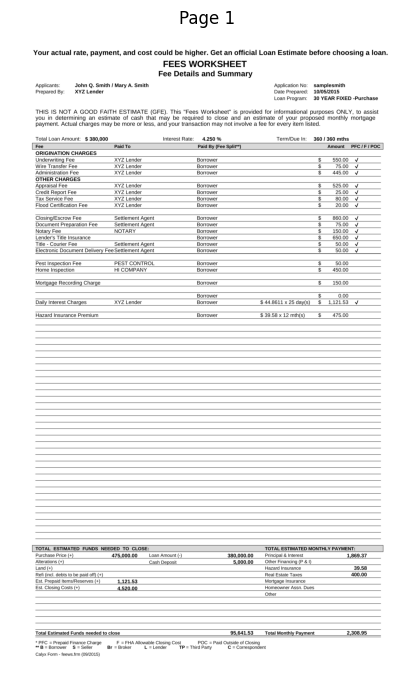

In [8]:
# Check if the 'images' list is not empty before attempting to display the PDF pages.
# The display_pdf_pages function expects a list of image data;
# an empty list would cause an error or produce an empty plot.
# If it's empty (False),
# a message is printed instead.
if images:
  display_pdf_pages(images)
else:
  print("No images to display")

In [9]:
# ==========================================================
# Step 4. OCR Processing
# Initialize PaddleOCR and process the images
# ==========================================================


# Initialize PaddleOCR
def initialize_ocr(language='en', use_gpu=False):
  """
  Initialize PaddleOCR with specified settings

  Args:
    language (str): Language code ('en', 'ch', 'fr', etc.)
    use_gpu (bool): Whether to use GPU for inference

  Returns:
    PaddleOCR: Initialized OCR object
  """
  try:
    ocr = PaddleOCR(
        use_textline_orientation=True, # Enable text angle
        lang=language, #Set language
    )
    print(f"PaddleOCR initialized for language: {language}")
    return ocr
  except Exception as e:
    print(f"Error initializing PaddleOCR: {e}")
    return None

In [10]:
# Initialize OCR
ocr = initialize_ocr('en')

/usr/local/lib/python3.12/dist-packages/paddle/utils/cpp_extension/extension_utils.py:718: UserWarning: No ccache found. Please be aware that recompiling all source files may be required. You can download and install ccache from: https://github.com/ccache/ccache/blob/master/doc/INSTALL.md
  warnings.warn(warning_message)
Creating model: ('PP-LCNet_x1_0_doc_ori', None)
Using official model (PP-LCNet_x1_0_doc_ori), the model files will be automatically downloaded and saved in `/root/.paddlex/official_models/PP-LCNet_x1_0_doc_ori`.
/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional t

Fetching 6 files:   0%|          | 0/6 [00:00<?, ?it/s]

README.md: 0.00B [00:00, ?B/s]

config.json: 0.00B [00:00, ?B/s]

.gitattributes: 0.00B [00:00, ?B/s]

inference.json: 0.00B [00:00, ?B/s]

inference.yml:   0%|          | 0.00/766 [00:00<?, ?B/s]

inference.pdiparams:   0%|          | 0.00/6.75M [00:00<?, ?B/s]

Creating model: ('UVDoc', None)
Using official model (UVDoc), the model files will be automatically downloaded and saved in `/root/.paddlex/official_models/UVDoc`.


Fetching 6 files:   0%|          | 0/6 [00:00<?, ?it/s]

.gitattributes: 0.00B [00:00, ?B/s]

inference.json: 0.00B [00:00, ?B/s]

inference.pdiparams:   0%|          | 0.00/32.1M [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

README.md: 0.00B [00:00, ?B/s]

inference.yml:   0%|          | 0.00/330 [00:00<?, ?B/s]

Creating model: ('PP-LCNet_x1_0_textline_ori', None)
Using official model (PP-LCNet_x1_0_textline_ori), the model files will be automatically downloaded and saved in `/root/.paddlex/official_models/PP-LCNet_x1_0_textline_ori`.


Fetching 6 files:   0%|          | 0/6 [00:00<?, ?it/s]

inference.yml:   0%|          | 0.00/735 [00:00<?, ?B/s]

inference.pdiparams:   0%|          | 0.00/6.74M [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

inference.json: 0.00B [00:00, ?B/s]

.gitattributes: 0.00B [00:00, ?B/s]

config.json: 0.00B [00:00, ?B/s]

Creating model: ('PP-OCRv5_server_det', None)
Using official model (PP-OCRv5_server_det), the model files will be automatically downloaded and saved in `/root/.paddlex/official_models/PP-OCRv5_server_det`.


Fetching 6 files:   0%|          | 0/6 [00:00<?, ?it/s]

README.md: 0.00B [00:00, ?B/s]

inference.yml:   0%|          | 0.00/903 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

inference.json: 0.00B [00:00, ?B/s]

.gitattributes: 0.00B [00:00, ?B/s]

inference.pdiparams:   0%|          | 0.00/87.9M [00:00<?, ?B/s]

Creating model: ('en_PP-OCRv5_mobile_rec', None)
Using official model (en_PP-OCRv5_mobile_rec), the model files will be automatically downloaded and saved in `/root/.paddlex/official_models/en_PP-OCRv5_mobile_rec`.


Fetching 6 files:   0%|          | 0/6 [00:00<?, ?it/s]

config.json: 0.00B [00:00, ?B/s]

inference.json: 0.00B [00:00, ?B/s]

README.md: 0.00B [00:00, ?B/s]

inference.pdiparams:   0%|          | 0.00/7.77M [00:00<?, ?B/s]

.gitattributes: 0.00B [00:00, ?B/s]

inference.yml: 0.00B [00:00, ?B/s]

PaddleOCR initialized for language: en


In [11]:
# Process images with OCR
def process_image_ocr(ocr, image, page_num=1):
  """
  Process a single image with OCR

  Args:
    ocr: PaddleOCR object
    image: PIL Image object
    page_num (int): Page number for identification

  Returns:
    tuple: (results, processed_image_path)
  """

  #Save image temporarily
  img_path = f'/content/page_{page_num}.png'
  image.save(img_path, 'PNG')

  #Perform OCR
  try:
    results = ocr.ocr(img_path)
    print(f"OCR completed for page {page_num}")
    return results, img_path
  except Exception as e:
    print(f"OCR error for page {page_num}: {e}")
    return None, img_path


In [12]:
# Process all pages
all_results = []
all_image_paths = []

for i, image in enumerate(images):
  results, img_path = process_image_ocr(ocr, image, i+1)
  all_results.append(results)
  all_image_paths.append(img_path)

/tmp/ipython-input-4173804145.py:21: DeprecationWarning: Please use `predict` instead.
  results = ocr.ocr(img_path)
Resized image size (4200x2550) exceeds max_side_limit of 4000. Resizing to fit within limit.


OCR completed for page 1


In [13]:
# =================================================================
# Step 5. Results Visualization
# Visualize OCR Results with bounding boxes and extracted text.
# =================================================================


# Visualization functions
def parse_ocr_result(ocr_result):
    """
    Parse OCR result and extract boxes, texts, and scores safely
    Handle both old format and new dictionary format

    Args:
        ocr_result: OCR results from PaddleOCR

    Returns:
        tuple: (boxes, texts, scores) or (None, None, None) if no valid results
    """
    if not ocr_result:
        return None, None, None


    # Handle list containing dictionary (newer PaddleOCR format)
    if isinstance(ocr_result, list) and len(ocr_result) > 0:
        first_element = ocr_result[0]

        # If first element is a dictionary, extract from it
        if isinstance(first_element, dict):

            if 'rec_texts' in first_element and 'rec_scores' in first_element and 'rec_polys' in first_element:
                boxes = first_element['rec_polys']
                txts = first_element['rec_texts']
                scores = first_element['rec_scores']

                return boxes, txts, scores
            else:
                return None, None, None

        # Handle traditional list format [[box, [text, score]], ...]
        elif isinstance(first_element, list):

            boxes = []
            txts = []
            scores = []

            for i, line in enumerate(ocr_result[0]):
                try:
                    if len(line) >= 2:
                        box = line[0]  # Bounding box coordinates

                        # Check if line[1] is a tuple/list with text and score
                        if isinstance(line[1], (list, tuple)) and len(line[1]) >= 2:
                            txt = line[1][0]  # Text
                            score = line[1][1]  # Confidence score
                        elif isinstance(line[1], str):
                            txt = line[1]
                            score = 1.0  # Default score
                        else:
                            continue

                        boxes.append(box)
                        txts.append(txt)
                        scores.append(score)

                except Exception as e:
                    print(f"Error parsing line {i}: {e}")
                    continue

            return boxes, txts, scores

    # Handle direct dictionary format
    elif isinstance(ocr_result, dict):

        if 'rec_texts' in ocr_result and 'rec_scores' in ocr_result and 'rec_polys' in ocr_result:
            boxes = ocr_result['rec_polys']
            txts = ocr_result['rec_texts']
            scores = ocr_result['rec_scores']

            return boxes, txts, scores
        else:

            return None, None, None

    print("Debug - Unrecognized OCR result format")
    return None, None, None

def draw_ocr_results(image_path, ocr_result):
    """
    Draw bounding boxes and text on the image

    Args:
        image_path (str): Path to the image file
        ocr_result: OCR results from PaddleOCR

    Returns:
        tuple: (annotated_image, boxes, txts, scores) or None if no results
    """
    boxes, txts, scores = parse_ocr_result(ocr_result)

    if not boxes:
        print("No valid OCR results to draw")
        return None

    # Load image
    image = Image.open(image_path).convert('RGB')
    draw = ImageDraw.Draw(image)


    # Draw bounding boxes and text
    for i, (box, txt, score) in enumerate(zip(boxes, txts, scores)):
        if score > 0.5:  # Lowered threshold to see more results
            try:


                # Handle different box formats
                if isinstance(box, np.ndarray):
                    # Convert numpy array to list for easier handling
                    box_points = box.tolist()
                else:
                    box_points = box

                # Ensure we have 4 corner points
                if len(box_points) >= 4:
                    # PaddleOCR typically returns 4 corner points: [top-left, top-right, bottom-right, bottom-left]
                    # Each point is [x, y]
                    if isinstance(box_points[0], (list, tuple, np.ndarray)) and len(box_points[0]) == 2:
                        # Format: [[x1,y1], [x2,y2], [x3,y3], [x4,y4]]
                        corners = [(int(point[0]), int(point[1])) for point in box_points[:4]]
                    else:
                        # Flatten format: [x1,y1,x2,y2,x3,y3,x4,y4]
                        flat_coords = box_points[:8]  # Take first 8 coordinates
                        corners = [(int(flat_coords[j]), int(flat_coords[j+1])) for j in range(0, 8, 2)]


                    # Draw the polygon (quadrilateral bounding box)
                    if len(corners) >= 4:
                        # Draw lines between consecutive corners and close the shape
                        for j in range(len(corners)):
                            start_point = corners[j]
                            end_point = corners[(j + 1) % len(corners)]  # Wrap around to first point
                            draw.line([start_point, end_point], fill='red', width=2)

                        # Add confidence score at top-left corner
                        try:
                            font = ImageFont.load_default()
                            text_x, text_y = corners[0]  # Use first corner (typically top-left)
                            draw.text((text_x, text_y - 15), f"{score:.2f}", fill='blue', font=font)
                        except Exception as font_error:
                            print(f"Font error: {font_error}")
                            pass
                    else:
                        print(f"Warning - Not enough corners for box {i}: {len(corners)}")
                else:
                    print(f"Warning - Box {i} doesn't have enough points: {len(box_points)}")

            except Exception as e:
                print(f"Error drawing box {i} for text '{txt[:20]}': {e}")
                print(f"Box data: {box}")
                continue

    return image, boxes, txts, scores

def display_ocr_results(image_path, ocr_result, page_num):
    """Display original image and OCR results side by side"""
    print(f"Starting visualization for page {page_num}")

    result_data = draw_ocr_results(image_path, ocr_result)

    if result_data is None:
        print(f"No text detected on page {page_num}")
        return None, None, None

    annotated_image, boxes, txts, scores = result_data
    original_image = Image.open(image_path)

    # Display images
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

    ax1.imshow(original_image)
    ax1.set_title(f'Original - Page {page_num}')
    ax1.axis('off')

    ax2.imshow(annotated_image)
    ax2.set_title(f'OCR Results - Page {page_num} ({len(txts)} items found)')
    ax2.axis('off')

    plt.tight_layout()
    plt.show()

    return boxes, txts, scores


Starting visualization for page 1


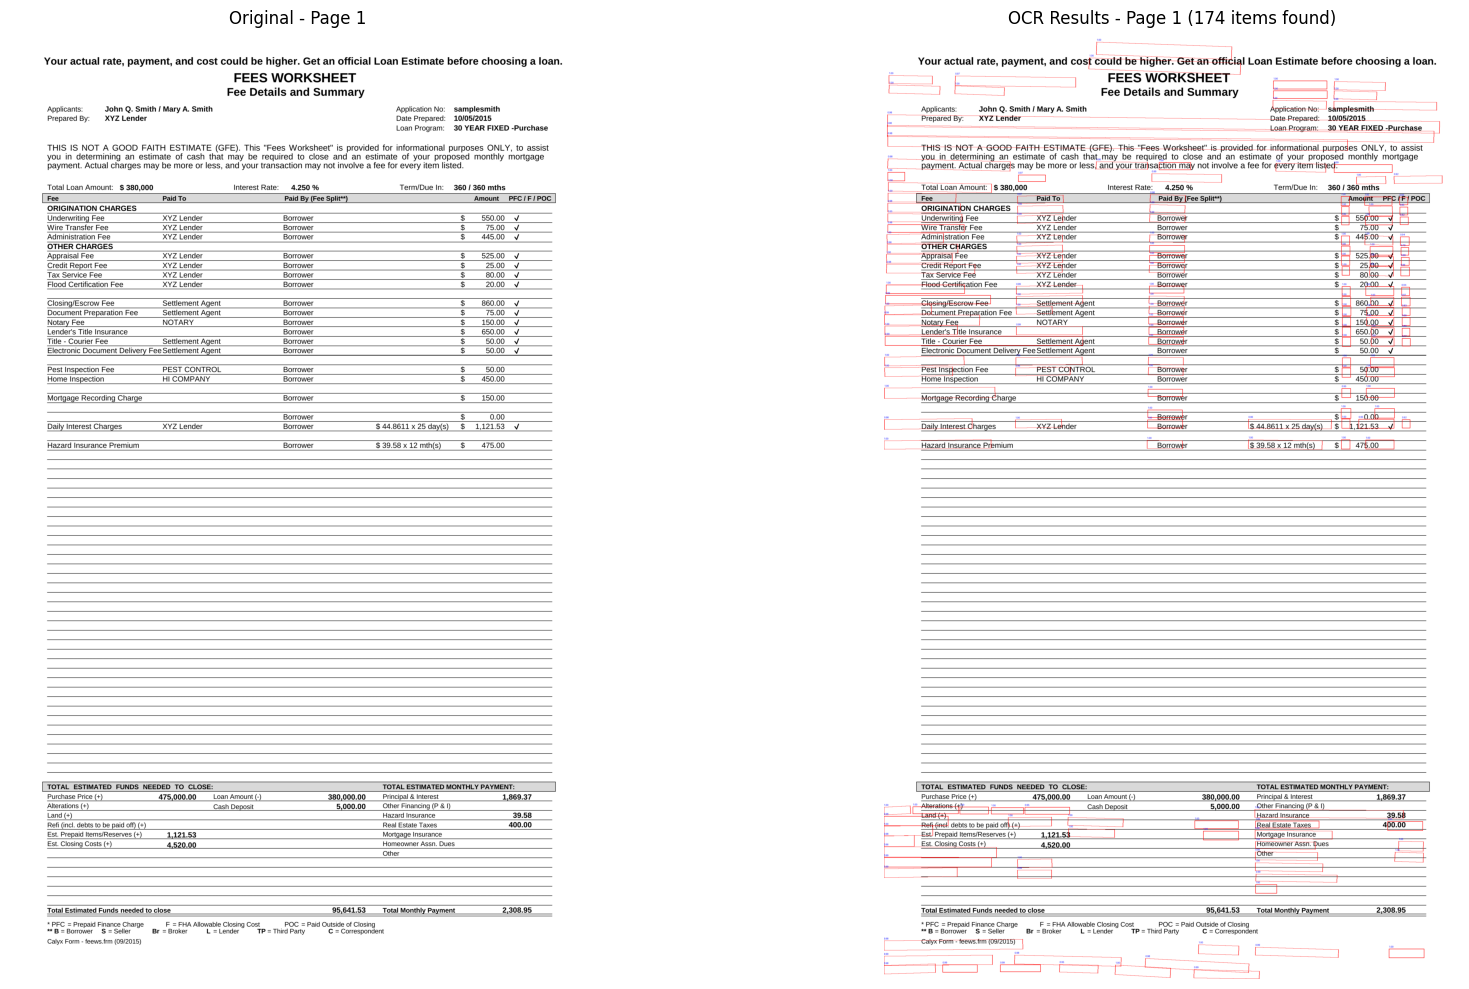


 Total text segments extracted: 174

 All Extracted Text:
  1. FEES WORKSHEET
  2. Fee Details and Summary
  3. Applicants:
  4. John Q. Smith / Mary A. Smith
  5. Application No:
  6. samplesmith
  7. Prepared By:
  8. XYZ Lender
  9. Date Prepared:
 10. 10/05/2015
 11. Loan Program:
 12. 30 YEAR FIXED -Purchase
 13. THIS IS NOT A GOOD FAITH ESTIMATE (GFE). This "Fees Worksheet" is provided for informational purposes ONLY, to assist
 14. you in determining an estimate of cash that may be required to close and an estimate of your proposed monthly mortgage
 15. payment. Actual charges may be more or less, and your transaction may not involve a fee for every item listed.
 16. Total Loan Amount: $ 380,000
 17. Interest Rate:
 18. 4.250 %
 19. Term/Due In:
 20. 360 / 360 mths
 21. Fee
 22. Paid To
 23. Paid By (Fee Split**)
 24. Amount
 25. PFCIF/ POC
 26. ORIGINATION CHARGES
 27. Underwriting Fee
 28. XYZ Lender
 29. Borrower
 30. $
 31. 550.00
 32. √
 33. Wire Transfer Fee
 34. XYZ Lend

In [14]:
# Process and display results for each page
extracted_text_all = []

for i, (result, img_path) in enumerate(zip(all_results, all_image_paths)):
    page_num = i + 1

    # Check if we have any OCR results
    if result:
        try:
            # Display visualization
            visualization_result = display_ocr_results(img_path, result, page_num)

            if visualization_result[0] is not None:  # Check if visualization succeeded
                boxes, txts, scores = visualization_result

                # Extract and display text
                page_text = []


                for j, (txt, score) in enumerate(zip(txts, scores)):
                    if score > 0.3:  # Lowered threshold to see more results
                        page_text.append(txt)

                extracted_text_all.extend(page_text)

            else:
                print(f" Failed to process OCR results for page {page_num}")

        except Exception as e:
            print(f" Error processing page {page_num}: {e}")
            import traceback
            traceback.print_exc()
    else:
        print(f" No OCR results for page {page_num}")

print(f"\n Total text segments extracted: {len(extracted_text_all)}")

# Display all extracted text
if extracted_text_all:
    print(f"\n All Extracted Text:")
    print("=" * 50)
    for i, text in enumerate(extracted_text_all, 1):
        print(f"{i:3d}. {text}")
else:
    print("No text was extracted from any page")

# **EasyOCR**

In [15]:
# ==========================================================
# Step 1. Installation
# Install specific compatible versions
# ==========================================================

# This combination is known to work well with SuryaOCR and transformers
!pip install easyocr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 29.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 180.7/180.7 kB 13.4 MB/s eta 0:00:00


In [16]:
# Install
!pip install pdf2image
!apt-get install poppler-utils -y

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
poppler-utils is already the newest version (22.02.0-2ubuntu0.12).
0 upgraded, 0 newly installed, 0 to remove and 41 not upgraded.


In [17]:
# ==========================================================
# Step 2. Import and setup EasyOCR
# Upload PDF and convert to image
# ==========================================================

# Import necessary libraries:
# files for Colab's file upload interface;
# convert_from_path (from pdf2image) to transform PDF pages into PIL Image objects;
# Image, ImageDraw (from PIL) for image manipulation;
# matplotlib.pyplot for plotting/displaying images;
# and easyocr for performing Optical Character Recognition on the images.
from google.colab import files
from google.colab import files
from pdf2image import convert_from_path
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
import easyocr

 Upload your PDF:


Saving LenderFeesWorksheetNew.pdf to LenderFeesWorksheetNew (2).pdf


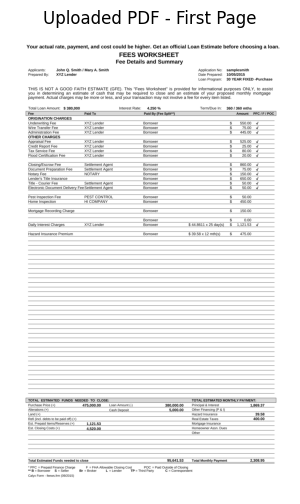

In [18]:
# Upload PDF
print(" Upload your PDF:")
uploaded = files.upload()
pdf_path = f"/content/{list(uploaded.keys())[0]}"

# Convert to image
images = convert_from_path(pdf_path, dpi=300)
image = images[0]  # Use first page
# Save image as file (EasyOCR works better with file paths)
image_path = '/content/page.png'
image.save(image_path)

# Show uploaded image
plt.figure(figsize=(10, 6))
plt.imshow(image)
plt.title('Uploaded PDF - First Page')
plt.axis('off')
plt.show()

In [19]:
# EasyOCR Processing
print(" Running EasyOCR...")

# Create reader (English)
reader = easyocr.Reader(['en'])

# Extract text
result = reader.readtext(image_path)

 Running EasyOCR...
Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


In [20]:
# Draw bounding boxes and extract text
img_copy = image.copy()
draw = ImageDraw.Draw(img_copy)
extracted_text = []


for (bbox, text, confidence) in result:
    if confidence > 0.5:  # Filter by confidence
        # Draw bounding box
        top_left = tuple(map(int, bbox[0]))
        bottom_right = tuple(map(int, bbox[2]))
        draw.rectangle([top_left, bottom_right], outline='red', width=2)

        # Add confidence score
        draw.text((top_left[0], top_left[1]-20), f"{confidence:.2f}", fill='red')

        extracted_text.append(text)

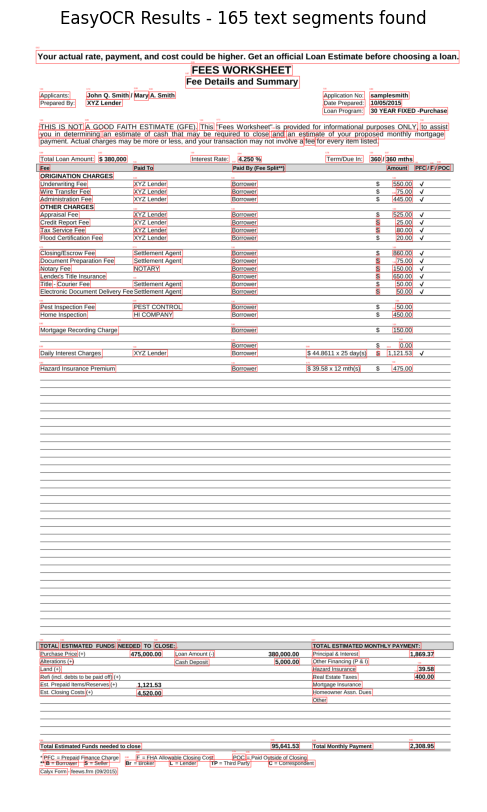

In [21]:
# Display results
plt.figure(figsize=(15, 10))
plt.imshow(img_copy)
plt.title(f'EasyOCR Results - {len(extracted_text)} text segments found')
plt.axis('off')
plt.show()

In [22]:
# Print extracted text
print(f"\n Extracted Text ({len(extracted_text)} segments):")
print("-" * 50)
for i, text in enumerate(extracted_text, 1):
    print(f"{i:2d}. {text}")

print(f"\n EasyOCR completed successfully!")


 Extracted Text (165 segments):
--------------------------------------------------
 1. Your actual rate, payment; and cost could be higher. Get an official Loan Estimate before choosing a Ioan.
 2. FEES WORKSHEET
 3. Fee Details and Summary
 4. Applicants:
 5. John Q. Smith
 6. A. Smith
 7. Application No:
 8. samplesmith
 9. Prepared By:
10. XYZ Lender
11. Date Prepared:
12. 10/05/2015
13. Loan Program:
14. 30 YEAR FIXED -Purchase
15. THIS IS NOT
16. A GOOD FAITH ESTIMATE (GFE):
17. This
18. "Fees Worksheet" is provided for informational purposes ONLY,
19. to assist
20. you in determining
21. an estimate of cash that may be required to close
22. and
23. an estimate of your proposed monthly mortgage
24. payment: Actual charges may be more or less, and your transaction may not involve a
25. for every item listed:
26. Total Loan Amount:
27. $ 380,000
28. Interest Rate:
29. 4.250 %
30. TermlDue In:
31. 360
32. 360 mths
33. Fee
34. Paid To
35. Paid By (Fee_Splittt)
36. Amount
37. PFC
38. 